In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import ndimage, misc
from PIL import Image
from IPython.display import Image, display
from glob import glob
from matplotlib.image import imread
from keras.models import Sequential, Model, load_model
from keras.utils import plot_model
from keras.layers import *
from keras.callbacks import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, adam
from sklearn.metrics import classification_report, confusion_matrix
from keras.applications.inception_v3 import InceptionV3

np.random.seed(3)

Using TensorFlow backend.


In [2]:
# By Augmentation, Accuracy 91.95% -> 93.77%
train_datagen = ImageDataGenerator(rescale=1./255,
    height_shift_range=0.05,\
    width_shift_range=0.05, \
    shear_range = 5, \
    zoom_range = 0.05, \
    rotation_range = 3, \
    horizontal_flip = True, \
    vertical_flip = True, \
    channel_shift_range = 15, \
    samplewise_center = True)
test_datagen = ImageDataGenerator(rescale=1./255, \
    samplewise_center = True)
val_datagen = ImageDataGenerator(rescale=1./255, \
    samplewise_center = True)

batch_size = 32 # 16->64->32
epochs = 200 # 50->100 ->200
root_path = '/home/mywork/kijun_kwon/data_split1'
train_path = root_path +'/train'
val_path = root_path +'/val'
test_path = root_path +'/test'
path_list = [train_path, val_path, test_path]

class_root='/home/mywork/kijun_kwon/data_split1/train'
class_list = [ item for item in os.listdir(class_root) if os.path.isdir(os.path.join(class_root, item)) ]
class_list.sort()

sizesOfSet = [0, 0, 0] # size of training set, validation set, test set
for p in range(len(path_list)) :
    for i in range(len(class_list)):
        sizesOfSet[p] += (len([name for name in os.listdir(path_list[p] + '/'+ class_list[i]) if os.path.isfile(os.path.join(path_list[p]+ '/'+ class_list[i], name))]))

image_height = 224
image_width = 224
channels = 3

In [3]:
model = InceptionV3(include_top=True, weights = None, input_tensor=None, input_shape=(image_height,image_width,channels), pooling=None, classes=len(class_list))

In [4]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        color_mode = "rgb",
        target_size=(image_height, image_width),
        batch_size = batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_path,
        shuffle = False,
        color_mode = "rgb",
        target_size=(image_height, image_width),    
        batch_size=batch_size,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        val_path,
        color_mode = "rgb",
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 1965 images belonging to 7 classes.
Found 658 images belonging to 7 classes.
Found 655 images belonging to 7 classes.


In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model_checkpoint = ModelCheckpoint(('./inceptionv3.{epoch:02d}.hdf5'),
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=True)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                                         patience=10, verbose=1)

callbacks = [model_checkpoint, reduce_learning_rate]

In [7]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch = sizesOfSet[0] // batch_size,
            epochs=epochs,
            validation_data=val_generator,
            validation_steps= sizesOfSet[1] // batch_size,
            callbacks=callbacks)

Epoch 1/200
61/61 [==============================] - 42s 691ms/step - loss: 1.7138 - acc: 0.4525 - val_loss: 10.5523 - val_acc: 0.3453

Epoch 00001: val_loss improved from inf to 10.55232, saving model to ./inceptionv3.01.hdf5
Epoch 2/200
61/61 [==============================] - 35s 578ms/step - loss: 1.1910 - acc: 0.5877 - val_loss: 3.3606 - val_acc: 0.2648

Epoch 00002: val_loss improved from 10.55232 to 3.36058, saving model to ./inceptionv3.02.hdf5
Epoch 3/200
61/61 [==============================] - 34s 552ms/step - loss: 0.9388 - acc: 0.6786 - val_loss: 9.0502 - val_acc: 0.4109

Epoch 00003: val_loss did not improve from 3.36058
Epoch 4/200
61/61 [==============================] - 31s 516ms/step - loss: 0.8469 - acc: 0.7090 - val_loss: 4.2708 - val_acc: 0.2456

Epoch 00004: val_loss did not improve from 3.36058
Epoch 5/200
61/61 [==============================] - 29s 474ms/step - loss: 0.7887 - acc: 0.7306 - val_loss: 3.6240 - val_acc: 0.2857

Epoch 00005: val_loss did not improv

61/61 [==============================] - 32s 531ms/step - loss: 0.0939 - acc: 0.9685 - val_loss: 0.2307 - val_acc: 0.9294

Epoch 00042: val_loss did not improve from 0.21893
Epoch 43/200
61/61 [==============================] - 26s 430ms/step - loss: 0.1054 - acc: 0.9654 - val_loss: 0.1899 - val_acc: 0.9516

Epoch 00043: val_loss improved from 0.21893 to 0.18992, saving model to ./inceptionv3.43.hdf5
Epoch 44/200
61/61 [==============================] - 29s 481ms/step - loss: 0.0825 - acc: 0.9713 - val_loss: 0.2158 - val_acc: 0.9374

Epoch 00044: val_loss did not improve from 0.18992
Epoch 45/200
61/61 [==============================] - 33s 539ms/step - loss: 0.1001 - acc: 0.9639 - val_loss: 0.2142 - val_acc: 0.9454

Epoch 00045: val_loss did not improve from 0.18992
Epoch 46/200
61/61 [==============================] - 28s 464ms/step - loss: 0.0787 - acc: 0.9749 - val_loss: 0.2348 - val_acc: 0.9406

Epoch 00046: val_loss did not improve from 0.18992
Epoch 47/200
61/61 [===============

61/61 [==============================] - 27s 438ms/step - loss: 0.0292 - acc: 0.9918 - val_loss: 0.2015 - val_acc: 0.9567

Epoch 00084: val_loss did not improve from 0.13404
Epoch 85/200
61/61 [==============================] - 27s 436ms/step - loss: 0.0340 - acc: 0.9885 - val_loss: 0.1980 - val_acc: 0.9609

Epoch 00085: val_loss did not improve from 0.13404
Epoch 86/200
61/61 [==============================] - 29s 480ms/step - loss: 0.0339 - acc: 0.9892 - val_loss: 0.1763 - val_acc: 0.9615

Epoch 00086: val_loss did not improve from 0.13404
Epoch 87/200
61/61 [==============================] - 27s 440ms/step - loss: 0.0371 - acc: 0.9862 - val_loss: 0.2285 - val_acc: 0.9567

Epoch 00087: val_loss did not improve from 0.13404
Epoch 88/200
61/61 [==============================] - 31s 500ms/step - loss: 0.0315 - acc: 0.9898 - val_loss: 0.1860 - val_acc: 0.9599

Epoch 00088: val_loss did not improve from 0.13404
Epoch 89/200
61/61 [==============================] - 38s 623ms/step - loss: 0

61/61 [==============================] - 33s 543ms/step - loss: 0.0363 - acc: 0.9885 - val_loss: 0.1953 - val_acc: 0.9599

Epoch 00126: val_loss did not improve from 0.11505

Epoch 00126: ReduceLROnPlateau reducing learning rate to 6.561000276406048e-08.
Epoch 127/200
61/61 [==============================] - 39s 641ms/step - loss: 0.0339 - acc: 0.9890 - val_loss: 0.1877 - val_acc: 0.9609

Epoch 00127: val_loss did not improve from 0.11505
Epoch 128/200
61/61 [==============================] - 28s 460ms/step - loss: 0.0256 - acc: 0.9918 - val_loss: 0.1943 - val_acc: 0.9599

Epoch 00128: val_loss did not improve from 0.11505
Epoch 129/200
61/61 [==============================] - 30s 497ms/step - loss: 0.0353 - acc: 0.9875 - val_loss: 0.1992 - val_acc: 0.9583

Epoch 00129: val_loss did not improve from 0.11505
Epoch 130/200
61/61 [==============================] - 27s 439ms/step - loss: 0.0311 - acc: 0.9898 - val_loss: 0.1775 - val_acc: 0.9615

Epoch 00130: val_loss did not improve from 0

61/61 [==============================] - 30s 487ms/step - loss: 0.0356 - acc: 0.9887 - val_loss: 0.1804 - val_acc: 0.9631

Epoch 00167: val_loss did not improve from 0.11505
Epoch 168/200
61/61 [==============================] - 31s 512ms/step - loss: 0.0374 - acc: 0.9885 - val_loss: 0.1911 - val_acc: 0.9599

Epoch 00168: val_loss did not improve from 0.11505
Epoch 169/200
61/61 [==============================] - 27s 442ms/step - loss: 0.0218 - acc: 0.9928 - val_loss: 0.1935 - val_acc: 0.9594

Epoch 00169: val_loss did not improve from 0.11505
Epoch 170/200
61/61 [==============================] - 29s 468ms/step - loss: 0.0308 - acc: 0.9913 - val_loss: 0.1926 - val_acc: 0.9599

Epoch 00170: val_loss did not improve from 0.11505
Epoch 171/200
61/61 [==============================] - 31s 508ms/step - loss: 0.0286 - acc: 0.9903 - val_loss: 0.2002 - val_acc: 0.9567

Epoch 00171: val_loss did not improve from 0.11505
Epoch 172/200
61/61 [==============================] - 29s 467ms/step - lo

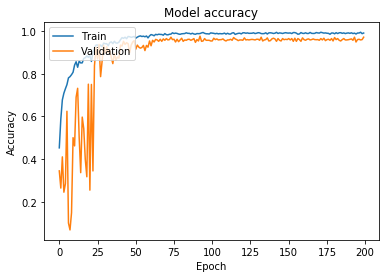

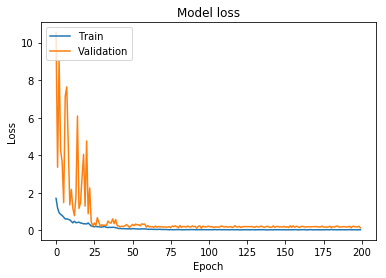

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
Y_pred = model.predict_generator(test_generator, sizesOfSet[2] // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('\tConfusion Matrix')
conf = confusion_matrix(test_generator.classes, y_pred)
print(conf)
print('\n\t\t\tClassification Report')
report = classification_report(test_generator.classes, y_pred, target_names=class_list)
report_dict = classification_report(test_generator.classes, y_pred, target_names=class_list, output_dict = True)
print(report)
print("\n-- Evaluate --")
scores = model.evaluate_generator(test_generator)
under = 1-report_dict['ok']['precision']
over = 1-report_dict['ok']['recall']
print("%s: %.2f\t%s: %.2f%%\n과검율: %.2f%%\t 미검율: %.2f%%"
      %(model.metrics_names[0], scores[0], model.metrics_names[1], scores[1]*100,
        over*100, under*100))

	Confusion Matrix
[[125   0   0   0   0   2   1]
 [  0  67   0   0   1   0   6]
 [  1   1 221   0   2   0   0]
 [  1   0   0  68   0   0   0]
 [  0   0   2   0  16   0   0]
 [  1   0   1   0   0  87   0]
 [  1   7   0   0   0   1  46]]

			Classification Report
               precision    recall  f1-score   support

         dent       0.97      0.98      0.97       128
discoloration       0.89      0.91      0.90        74
           ok       0.99      0.98      0.98       225
        other       1.00      0.99      0.99        69
      scratch       0.84      0.89      0.86        18
         sink       0.97      0.98      0.97        89
    substance       0.87      0.84      0.85        55

    micro avg       0.96      0.96      0.96       658
    macro avg       0.93      0.94      0.93       658
 weighted avg       0.96      0.96      0.96       658


-- Evaluate --
loss: 0.19	acc: 95.74%
과검율: 1.78%	 미검율: 1.34%


In [10]:
error_truth = list()
error_count = list()
error_pred = list()
count = 0
for i in range(len(y_pred)):
    if i>0 :
        if test_generator.classes[i-1]!=test_generator.classes[i]:
            count = 0
    if(test_generator.classes[i]!=y_pred[i]):
        error_truth += [test_generator.classes[i]]
        error_count += [count]
        error_pred += [y_pred[i]]
    count += 1

In [11]:
underImageList = list()
for i in range(len(class_list)):
    lgc_file = glob(test_path + '/' + class_list[i] + '/*.jpg')
    for j in range(len(error_truth)):
        if i==error_truth[j] :
#             print('Truth: ')
#             print(class_list[error_truth[j]])
#             print('Predicted as: ')
#             print(class_list[error_pred[j]])
#             display(Image(filename=lgc_file[error_count[j]]) )
            if error_pred[j]==2 :
                underImageList.append(lgc_file[error_count[j]])

In [12]:
underImageList

['/home/mywork/kijun_kwon/data_split1/test/scratch/DDMRA08S_20180123101328_11_BOTTOM.jpg',
 '/home/mywork/kijun_kwon/data_split1/test/scratch/DDMRB11S_20180303093515_08_BOTTOM.jpg',
 '/home/mywork/kijun_kwon/data_split1/test/sink/DDMQL12S_20171229140534_07_BOTTOM.jpg']